   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    3      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket  Fare Cabin Embarked Title  FamilySize  IsAlone  
0      0         A/5 21171     0   NaN        S    Mr           2        0  
1      0          PC 17599     3   C85        C   Mrs           2        0  
2      0  STON/O2. 3101282     0   NaN        S  Miss           1        1  
3      0          

<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
/var/folders/c6/6xxjr4gn7f9fvxxjmt2xl3mw0000gn/T/ipykernel_11714/2041086049.py:16: SyntaxWarning: invalid escape sequence '\.'
  titanic_dataset['Title'] = titanic_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/var/folders/c6/6xxjr4gn7f9fvxxjmt2xl3mw0000gn/T/ipykernel_11714/2041086049.py:16: SyntaxWarning: invalid escape sequence '\.'
  titanic_dataset['Title'] = titanic_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


ValueError: could not convert string to float: 'A/5 21171'

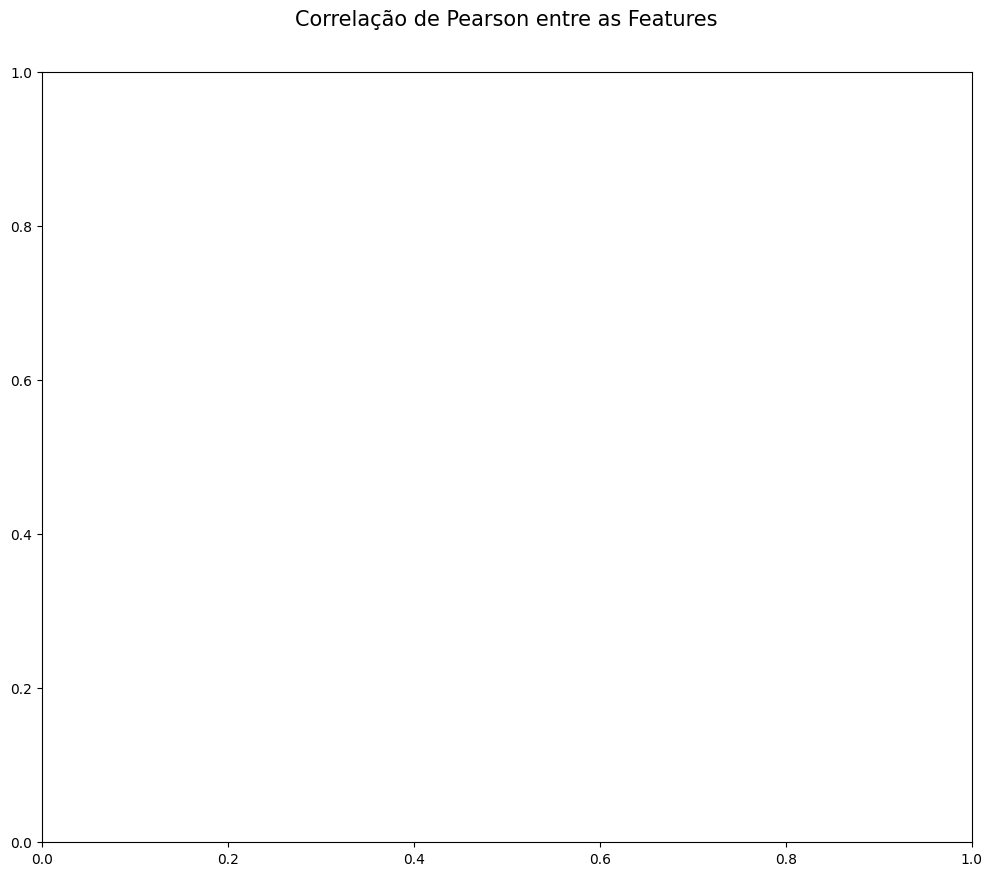

In [ ]:
# Análise Exploratória e Visualização do Titanic Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
titanic_dataset = pd.read_csv('Titanic-Dataset.csv')

# ------------------------------------------
# Limpeza e Engenharia de Atributos
# ------------------------------------------

# Extraindo título dos nomes
titanic_dataset['Title'] = titanic_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Preenchendo valores nulos de idade com a média agrupada por Sexo, Classe e Título
titanic_dataset['Age'] = titanic_dataset.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.mean()))

# Criando atributo de tamanho da família
titanic_dataset['FamilySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1

# Criando atributo se está sozinho
titanic_dataset['IsAlone'] = (titanic_dataset['FamilySize'] == 1).astype(int)

# ------------------------------------------
# Transformação de Fare (Tarifa) em Categorias
# ------------------------------------------

titanic_dataset.loc[titanic_dataset['Fare'] <= 8, 'Fare'] = 0
titanic_dataset.loc[(titanic_dataset['Fare'] > 8) & (titanic_dataset['Fare'] <= 14), 'Fare'] = 1
titanic_dataset.loc[(titanic_dataset['Fare'] > 14) & (titanic_dataset['Fare'] <= 31), 'Fare'] = 2
titanic_dataset.loc[titanic_dataset['Fare'] > 31, 'Fare'] = 3
titanic_dataset['Fare'] = titanic_dataset['Fare'].astype(int)

# ------------------------------------------
# Transformação de Age (Idade) em Faixas
# ------------------------------------------

titanic_dataset.loc[titanic_dataset['Age'] <= 21, 'Age'] = 0
titanic_dataset.loc[(titanic_dataset['Age'] > 21) & (titanic_dataset['Age'] <= 29), 'Age'] = 1
titanic_dataset.loc[(titanic_dataset['Age'] > 29) & (titanic_dataset['Age'] <= 36), 'Age'] = 2
titanic_dataset.loc[titanic_dataset['Age'] > 36, 'Age'] = 3
titanic_dataset['Age'] = titanic_dataset['Age'].astype(int)

# Verificando o dataset após transformação
print(titanic_dataset.head())

# ------------------------------------------
# Heatmap de Correlação entre as Variáveis
# ------------------------------------------

plt.figure(figsize=(12, 10))
colormap = plt.cm.viridis
plt.title('Correlação de Pearson entre as Features', y=1.05, size=15)

titanic_dataset['Title'] = titanic_dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_dataset['Title'] = titanic_dataset['Title'].replace(['Mile', 'Mme', 'Mlle', 'Ms'], 'Miss')

titanic_dataset['Sex'] = titanic_dataset['Sex'].map({'female': 0, 'male': 1})
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
titanic_dataset['Title'] = titanic_dataset['Title'].map(title_mapping)
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].map(embarked_mapping)

titanic_dataset = titanic_dataset.drop(columns=['Name','SibSp','Parch', 'PassengerId','Ticket', 'Cabin'])

print(titanic_dataset.columns,titanic_dataset.head())

sns.heatmap(
    titanic_dataset.astype(float).corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor='white',
    annot=True
)
plt.show()

# ------------------------------------------
# Visualização de Features Individuais
# ------------------------------------------

# Sobrevivência por Tamanho da Família
sns.countplot(data=titanic_dataset, x='FamilySize', hue='Survived')
plt.title('Sobrevivência por Tamanho da Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Quantidade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Sobrevivência por Fare (Tarifa categorizada)
sns.countplot(data=titanic_dataset, x='Fare', hue='Survived')
plt.title('Sobrevivência por Tarifa')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Quantidade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Sobrevivência por Age (Idade categorizada)
sns.countplot(data=titanic_dataset, x='Age', hue='Survived')
plt.title('Sobrevivência por Faixa de Idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Sobrevivência por IsAlone
sns.countplot(data=titanic_dataset, x='IsAlone', hue='Survived')
plt.title('Sobrevivência por Estar Sozinho')
plt.xlabel('Está Sozinho (1 = Sim, 0 = Não)')
plt.ylabel('Quantidade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()
